In [142]:
from scipy.special import logsumexp
from sklearn.cluster import KMeans
from scipy.special import logsumexp
import sys

class EM:
    p = None
    dim = None # dimension of the data space
    n_points = None # Number of data points
    n_clusters = None # Number of clusters
    pi = None # The prior probability vector of pi_j values
    nnz = None
    p_spread = .99 # the probability weight
    X = None # the data
    q_all = [sys.maxsize]
    
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        return
    
    def initialize(self):
        # init p, based on random X but keep all values non zero     
        self.p = np.zeros(shape = (self.dim, self.n_clusters))
        samples = np.random.randint(0, self.n_points-1, self.n_clusters)
        for i, idx in enumerate(samples):
            self.p[:, i] = (self.X[idx, :] + 1)/(np.sum(self.X[idx, :]) + self.dim)        
        
        # the prior
        self.pi = np.ones(shape = self.n_clusters)/self.n_clusters
        return
    
    def fit(self, X):
        self.n_points = X.shape[0]
        self.dim = X.shape[1]
        self.X = X
        self.initialize();
        display(self.pi)
        i = 1
        while i < 100:
            w = self.e_step()
            self.m_step(w)
            i = i + 1
            
        return
    
    def e_step(self):
        W = np.dot(self.X, np.log(self.p)) + np.log(self.pi)
        maxs = W.max(axis=1)
        W = (W.T - maxs).T
        W = (W.T - np.log(np.sum(np.exp(W), axis = 1))).T
        W = np.exp(W)
        return W
    
    def m_step(self, W):
        self.pi = np.sum(W, axis = 0)/self.n_points
        self.p = np.dot(self.X.T, W) + 1.0/self.dim
        
        colsum = np.sum(self.p, axis = 0)
        self.p = self.p/colsum
        return
        

In [143]:
# Load the data
nips_data = np.loadtxt('docword.nips.txt', skiprows=3, dtype=int)
X = np.zeros(shape=(1500, 12419))

# Prepare X
for row in nips_data:
    X[row[0]-1][row[1] -1] = row[2]

em = EM(n_clusters=30)
em.fit(X)
display(em.pi)

array([ 0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333])

array([ 0.00272855,  0.03149104,  0.04745705,  0.02541001,  0.05218959,
        0.03221946,  0.0160613 ,  0.04943047,  0.09358121,  0.07225768,
        0.0146903 ,  0.00136283,  0.03149871,  0.05345986,  0.01093759,
        0.01202083,  0.01740057,  0.00490765,  0.01668286,  0.00735053,
        0.06505903,  0.01740047,  0.00939268,  0.06540778,  0.08958973,
        0.00935842,  0.00200465,  0.10509282,  0.01400931,  0.02954703])

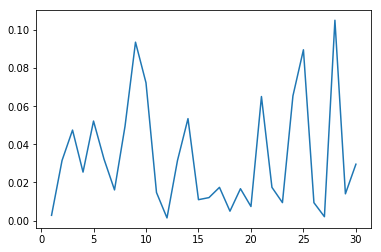

In [144]:
plt.plot([i for i in range(1,31)], em.pi)

In [141]:
em.pi.sum()
em.p.shape

(12419, 30)

In [145]:
words = [line.strip() for line in open('vocab.nips.txt')]

p = em.p.T
for j in range(30):
    ind = np.argpartition(p[j,], - 10)[-10:]
    ind = ind[np.argsort(p[j, ind])][::-1] # sorted indices
    print("Topic " + str(j) + ":", ", ".join([words[i] for i in ind]))

Topic 0: gamma, memory, model, neural, operator, network, system, signal, principe, delay
Topic 1: network, learning, neural, function, unit, training, input, model, set, system
Topic 2: data, network, function, classifier, set, algorithm, model, learning, problem, error
Topic 3: network, unit, weight, learning, training, algorithm, neural, problem, input, hidden
Topic 4: neuron, model, cell, spike, input, unit, firing, pattern, information, neural
Topic 5: cell, model, direction, input, network, orientation, function, neuron, unit, visual
Topic 6: data, algorithm, network, set, input, model, neural, training, classification, learning
Topic 7: network, error, weight, training, set, data, function, neural, model, input
Topic 8: network, input, unit, model, system, output, object, neural, training, set
Topic 9: function, algorithm, learning, set, network, training, weight, number, input, error
Topic 10: network, bound, model, function, mean, field, variables, algorithm, distribution, log